In [2]:
from pycirclize import Circos
from pycirclize.utils import ColorCycler, load_eukaryote_example_dataset
import numpy as np
np.random.seed(0)

In [3]:
import pandas as pd
df = pd.read_csv("final_gene.csv")
df.drop(columns=df.columns[0], axis=1, inplace=True)
df.drop(columns=df.columns[4], axis=1, inplace=True)
df.drop(columns=df.columns[5], axis=1, inplace=True)
df.drop(columns=df.columns[6], axis=1, inplace=True)
df



,Chr,Start,End,q values,negLogQ,type
0,chr1,39109153,41523062,1.280000e-21,20.892790,amp
1,chr1,148646436,149486905,5.190000e-18,17.284833,amp
2,chr1,232526850,233617929,8.670000e-07,6.061981,amp
3,chr1,154088696,154329131,3.880000e-09,8.411168,amp
4,chr1,36338557,36480225,2.120000e-11,10.673664,amp
...,...,...,...,...,...,...
108,chr19,1,306931,3.030000e-56,55.518557,del
109,chr19,45712960,55025072,4.274900e-02,1.369074,del
110,chr21,41501909,46944323,4.164300e-02,1.380458,del
111,chr21,1,23298229,1.032700e-04,3.986026,del


In [4]:
df['dist'] = df['End'] - df['Start']

# Determine the maximum distance for each chromosome and add it as a new column
df['max_distance'] = df.groupby('Chr')['dist'].transform('max')

# Add the minimum start value for each chromosome to the DataFrame
df['min_start'] = df.groupby('Chr')['Start'].transform('min')

# Add the maximum end value for each chromosome to the DataFrame
df['max_end'] = df.groupby('Chr')['End'].transform('max')

df['n_start'] = ((df['Start'] - df['min_start']) * df['max_distance']) / (df['max_end'] - df['min_start'])
df['n_end'] = ((df['End'] - df['min_start']) * df['max_distance']) / (df['max_end'] - df['min_start'])

df_copy = df.copy()
df

,Chr,Start,End,q values,negLogQ,type,dist,max_distance,min_start,max_end,n_start,n_end
0,chr1,39109153,41523062,1.280000e-21,20.892790,amp,2413909,62675788,1,247249719,9.913851e+06,1.052576e+07
1,chr1,148646436,149486905,5.190000e-18,17.284833,amp,840469,62675788,1,247249719,3.768066e+07,3.789371e+07
2,chr1,232526850,233617929,8.670000e-07,6.061981,amp,1091079,62675788,1,247249719,5.894366e+07,5.922024e+07
3,chr1,154088696,154329131,3.880000e-09,8.411168,amp,240435,62675788,1,247249719,3.906023e+07,3.912118e+07
4,chr1,36338557,36480225,2.120000e-11,10.673664,amp,141668,62675788,1,247249719,9.211528e+06,9.247439e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
108,chr19,1,306931,3.030000e-56,55.518557,del,306930,9312112,1,63811651,0.000000e+00,4.479067e+04
109,chr19,45712960,55025072,4.274900e-02,1.369074,del,9312112,9312112,1,63811651,6.670948e+06,8.029876e+06
110,chr21,41501909,46944323,4.164300e-02,1.380458,del,5442414,23298228,1,46944323,2.059719e+07,2.329823e+07
111,chr21,1,23298229,1.032700e-04,3.986026,del,23298228,23298228,1,46944323,0.000000e+00,1.156279e+07


In [5]:


df['Chr_numeric'] = df['Chr'].str.extract('(\d+)').astype(int)

# Sort based on the numeric part and drop the helper column
df = df.sort_values('Chr_numeric').drop('Chr_numeric', axis=1)
df = df.groupby("Chr")["max_distance"].first().reset_index()
df



def extract_numeric_part(chromosome):
    return int(chromosome[3:])

df['Chromosome_num'] = df['Chr'].apply(extract_numeric_part)

df = df.sort_values(by='Chromosome_num')
df.drop('Chromosome_num', axis=1, inplace=True)
df["Chr2"] = df["Chr"]
df["start"] = 0
new_order = ['Chr', 'start', 'max_distance', "Chr2"]

# Reorder the columns using the new order
df = df[new_order]
df

output_file_path = './output_data.txt'
df.to_csv(output_file_path, sep='\t', index=False)

print(f'DataFrame has been saved to {output_file_path}')

DataFrame has been saved to ./output_data.txt


In [6]:
df_copy
amp_df = df_copy[df_copy["type"]=="amp"]
del_df = df_copy[df_copy["type"]=="del"]
amp_df

,Chr,Start,End,q values,negLogQ,type,dist,max_distance,min_start,max_end,n_start,n_end
0,chr1,39109153,41523062,1.280000e-21,20.892790,amp,2413909,62675788,1,247249719,9.913851e+06,1.052576e+07
1,chr1,148646436,149486905,5.190000e-18,17.284833,amp,840469,62675788,1,247249719,3.768066e+07,3.789371e+07
2,chr1,232526850,233617929,8.670000e-07,6.061981,amp,1091079,62675788,1,247249719,5.894366e+07,5.922024e+07
3,chr1,154088696,154329131,3.880000e-09,8.411168,amp,240435,62675788,1,247249719,3.906023e+07,3.912118e+07
4,chr1,36338557,36480225,2.120000e-11,10.673664,amp,141668,62675788,1,247249719,9.211528e+06,9.247439e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
58,chr19,20823633,21917935,3.310000e-05,4.480172,amp,1094302,9312112,1,63811651,3.038818e+06,3.198511e+06
59,chr20,45338887,45497265,4.886900e-04,3.310967,amp,158378,1024003,29703246,62435964,4.891419e+05,4.940965e+05
60,chr20,61411961,62435964,9.720000e-06,5.012334,amp,1024003,1024003,29703246,62435964,9.919683e+05,1.024003e+06
61,chr20,29703246,29808748,3.474400e-04,3.459120,amp,105502,1024003,29703246,62435964,0.000000e+00,3.300501e+03


No AMP data for chr9
No AMP data for chr13
No AMP data for chr16
No DEL data for chr20
No AMP data for chr21


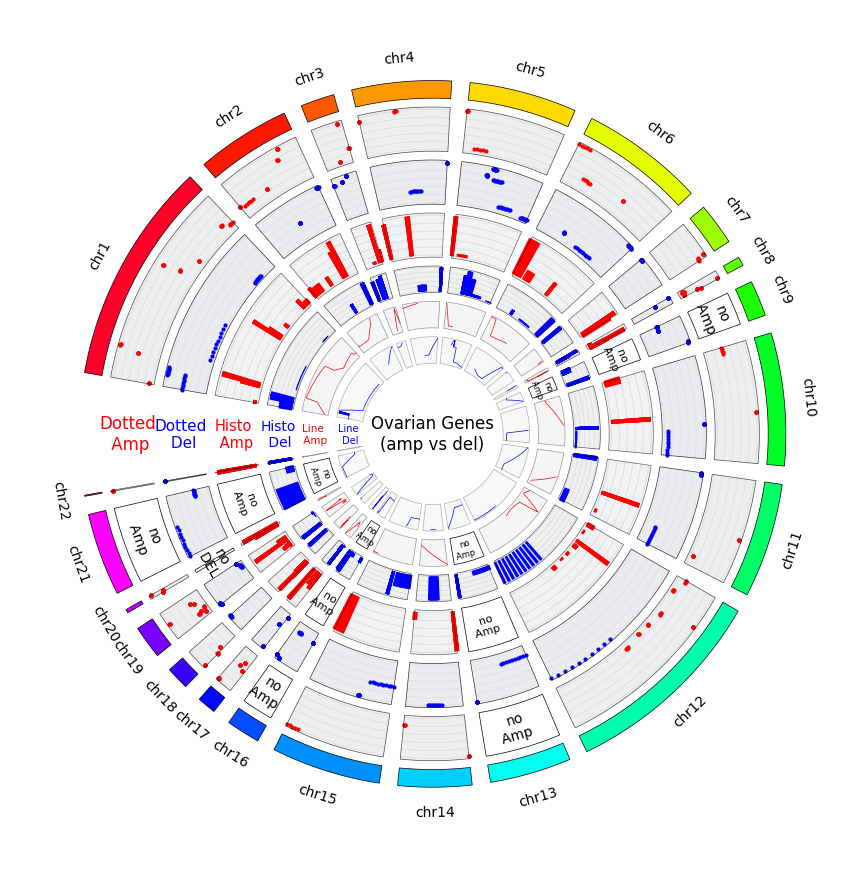

In [7]:
chr_bed_file = './output_data.bed'  
circos = Circos.initialize_from_bed(chr_bed_file, start=-80, end=260, space=3, endspace=False)
circos.text("Ovarian Genes\n(amp vs del)", size=12)


ColorCycler.set_cmap("gist_rainbow")
chr_names = [s.name for s in circos.sectors]
colors = ColorCycler.get_color_list(len(chr_names))
chr_name2color = {name: color for name, color in zip(chr_names, colors)}


for sector in circos.sectors:
    sector.text(sector.name.replace("Chr", ""))
    color = chr_name2color[sector.name]
    outer_track = sector.add_track((95, 100))
    outer_track.axis(fc=color)
    
    step = 2000000
    
    cur_df = amp_df[amp_df["Chr"] == sector.name]
    del_cur_df = del_df[del_df["Chr"] == sector.name]
    
    # Check if cur_df is empty for amp genes
    if not cur_df.empty:
        tx = np.concatenate([np.linspace(row['n_start'], row['n_end'], 5) for index, row in cur_df.iterrows()])
        ty = np.concatenate([[row['negLogQ']] * 5 for index, row in cur_df.iterrows()])

        data = {
            'tx': tx,
            'ty': ty
        }
        df_tx_ty = pd.DataFrame(data)
        df_tx_ty_sorted = df_tx_ty.sort_values(by='tx').reset_index(drop=True)

        tx = df_tx_ty_sorted['tx'].values
        ty = df_tx_ty_sorted['ty'].values

        # print(df_tx_ty_sorted.head())
        
        track1 = sector.add_track((80, 92.5), r_pad_ratio=0.1)
        track1.axis(fc="#e6e8eb", alpha=0.7)
        track1.grid()
        min_qval = cur_df['negLogQ'].min()  # Find the minimum qval in your data
        max_qval = cur_df['negLogQ'].max()  
        track1.scatter(tx, ty, vmax=max_qval, color="red")
        
        track2 = sector.add_track((50, 62.5), r_pad_ratio=0.1)
        track2.axis(fc="#e6e8eb", alpha=0.6)
        track2.grid()
        # add width = step
        track2.bar(tx, ty, width = step, color="red")
        
        track3 = sector.add_track((30, 37.5), r_pad_ratio=0.1)
        track3.axis(fc="#e6e8eb", alpha=0.4)
        track3.line(tx, ty, color="red")
        
        if sector.name == circos.sectors[0].name:
            circos.text("Dotted\n Amp", r=track1.r_center, deg=-90, color="red", size = 12)
            circos.text("Histo\n Amp", r=track2.r_center, deg=-90, color="red", size= 10.5)
            circos.text("Line\n Amp", r=track3.r_center, deg=-90, color="red", size=7.5)
    else:
        track1 = sector.add_track((80, 92.5), r_pad_ratio=0.1)
        track1.axis()
        track1.text("no\nAmp ", size=10)
        track2 = sector.add_track((50, 62.5), r_pad_ratio=0.1)
        track2.axis()
        track2.text("no\nAmp ", size=8)
        track3 = sector.add_track((30, 37.5), r_pad_ratio=0.1)
        track3.axis()
        track3.text("no\nAmp ", size = 6)
        print(f"No AMP data for {sector.name}")
    
    # graph for deletion genes
    if not del_cur_df.empty:
        tx = np.concatenate([np.linspace(row['n_start'], row['n_end'], 10) for index, row in del_cur_df.iterrows()])
        ty = np.concatenate([[row['negLogQ']] * 10 for index, row in del_cur_df.iterrows()])

        data = {
            'tx': tx,
            'ty': ty
        }
        df_tx_ty = pd.DataFrame(data)
        df_tx_ty_sorted = df_tx_ty.sort_values(by='tx').reset_index(drop=True)

        tx = df_tx_ty_sorted['tx'].values
        ty = df_tx_ty_sorted['ty'].values

        # print(df_tx_ty_sorted.head())
        
        track1 = sector.add_track((65, 77.5), r_pad_ratio=0.1)
        track1.axis(fc="#e6e8eb", alpha=0.8)
        track1.grid()
        min_qval = del_cur_df['negLogQ'].min()  # Find the minimum qval in your data
        max_qval = del_cur_df['negLogQ'].max()  
        track1.scatter(tx, ty, vmax=max_qval, color="blue")
        
        track2 = sector.add_track((40, 47.5), r_pad_ratio=0.1)
        track2.axis(fc="#e6e8eb", alpha=0.65)
        track2.grid()
        # set width=step * 0.3
        track2.bar(tx, ty, width=step, color="blue")
        
        track3 = sector.add_track((20, 27.5), r_pad_ratio=0.1)
        track3.axis(fc="#e6e8eb", alpha=0.3)
        track3.line(tx, ty, color="blue")
        
        if sector.name == circos.sectors[0].name:
            circos.text("Dotted\n Del", r=track1.r_center, deg=-90, color="blue", size = 11)
            circos.text("Histo\n Del", r=track2.r_center, deg=-90, color="blue", size= 10)
            circos.text("Line\n Del", r=track3.r_center, deg=-90, color="blue", size=7)
        
    else:
        track1 = sector.add_track((65, 77.5), r_pad_ratio=0.1)
        track1.axis()
        track1.text("no\nDEL")
        print(f"No DEL data for {sector.name}")

    
        

    

fig = circos.plotfig()

No AMP data for chr9
No AMP data for chr13
No AMP data for chr16
No AMP data for chr21


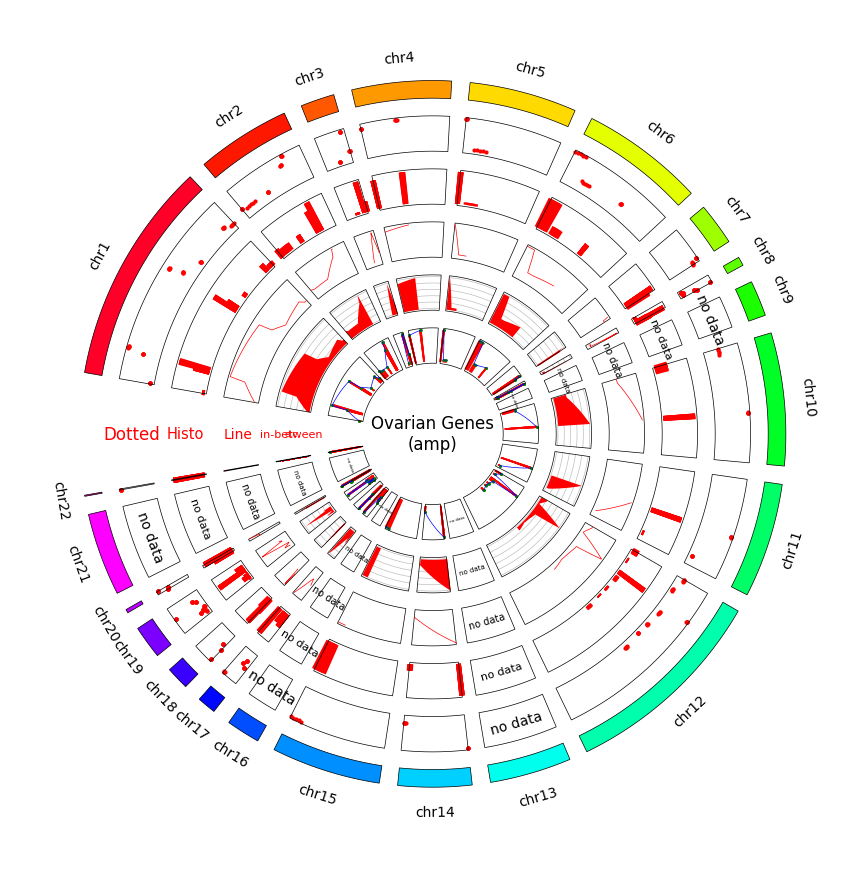

In [11]:
chr_bed_file = './output_data.bed'  
circos = Circos.initialize_from_bed(chr_bed_file, start=-80, end=260, space=3, endspace=False)
circos.text("Ovarian Genes\n(amp)", size=12)


ColorCycler.set_cmap("gist_rainbow")
chr_names = [s.name for s in circos.sectors]
colors = ColorCycler.get_color_list(len(chr_names))
chr_name2color = {name: color for name, color in zip(chr_names, colors)}


for sector in circos.sectors:
    sector.text(sector.name.replace("Chr", ""))
    color = chr_name2color[sector.name]
    outer_track = sector.add_track((95, 100))
    outer_track.axis(fc=color)
    
    step = 2000000
    
    cur_df = amp_df[amp_df["Chr"] == sector.name]
    
    # Check if cur_df is empty for amp genes
    if not cur_df.empty:
        tx = np.concatenate([np.linspace(row['n_start'], row['n_end'], 5) for index, row in cur_df.iterrows()])
        ty = np.concatenate([[row['negLogQ']] * 5 for index, row in cur_df.iterrows()])

        data = {
            'tx': tx,
            'ty': ty
        }
        df_tx_ty = pd.DataFrame(data)
        df_tx_ty_sorted = df_tx_ty.sort_values(by='tx').reset_index(drop=True)

        tx = df_tx_ty_sorted['tx'].values
        ty = df_tx_ty_sorted['ty'].values

        # print(df_tx_ty_sorted.head())
        
        track1 = sector.add_track((80, 90), r_pad_ratio=0.1)
        track1.axis()
        min_qval = cur_df['negLogQ'].min()  # Find the minimum qval in your data
        max_qval = cur_df['negLogQ'].max()  
        track1.scatter(tx, ty, vmax=max_qval, color="red")
        
        track2 = sector.add_track((65, 75), r_pad_ratio=0.1)
        track2.axis()
        # add width = step
        track2.bar(tx, ty, width = step, color="red")
        
        track3 = sector.add_track((50, 60), r_pad_ratio=0.1)
        track3.axis()
        track3.line(tx, ty, color="red")
        
        track4 = sector.add_track((35, 45), r_pad_ratio=0.1)
        track4.axis()
        track4.grid()
        track4.fill_between(tx, ty, color="red")
        
        line_bar_scatter_track = sector.add_track((20, 30), r_pad_ratio=0.1)
        line_bar_scatter_track.axis()
        line_bar_scatter_track.line(tx, ty, color="blue")
        line_bar_scatter_track.bar(tx, ty, width=step, color="red")
        line_bar_scatter_track.scatter(tx, ty, color="green", s=3)
        
        if sector.name == circos.sectors[0].name:
            circos.text("Dotted", r=track1.r_center, deg=-90, color="red", size = 12)
            circos.text("Histo", r=track2.r_center, deg=-90, color="red", size= 10.5)
            circos.text("Line", r=track3.r_center, deg=-90, color="red", size=10)
            circos.text("in-between", r=track4.r_center, deg=-90, color="red", size=8)
            circos.text("etc", r=track4.r_center, deg=-90, color="red", size=6)
            
    else:
        track1 = sector.add_track((80, 90), r_pad_ratio=0.1)
        track1.axis()
        track1.text("no data")
        
        track2 = sector.add_track((65, 75), r_pad_ratio=0.1)
        track2.axis()
        track2.text("no data", size = 8)
        
        track3 = sector.add_track((50, 60), r_pad_ratio=0.1)
        track3.axis()
        track3.text("no data", size = 7)
        
        track4 = sector.add_track((35, 45), r_pad_ratio=0.1)
        track4.axis()
        track4.text("no data", size = 5)
        
        line_bar_scatter_track = sector.add_track((20, 30), r_pad_ratio=0.1)
        line_bar_scatter_track.axis()
        line_bar_scatter_track.text("no data", size = 3)
        print(f"No AMP data for {sector.name}")
    

fig = circos.plotfig()

No AMP data for chr20


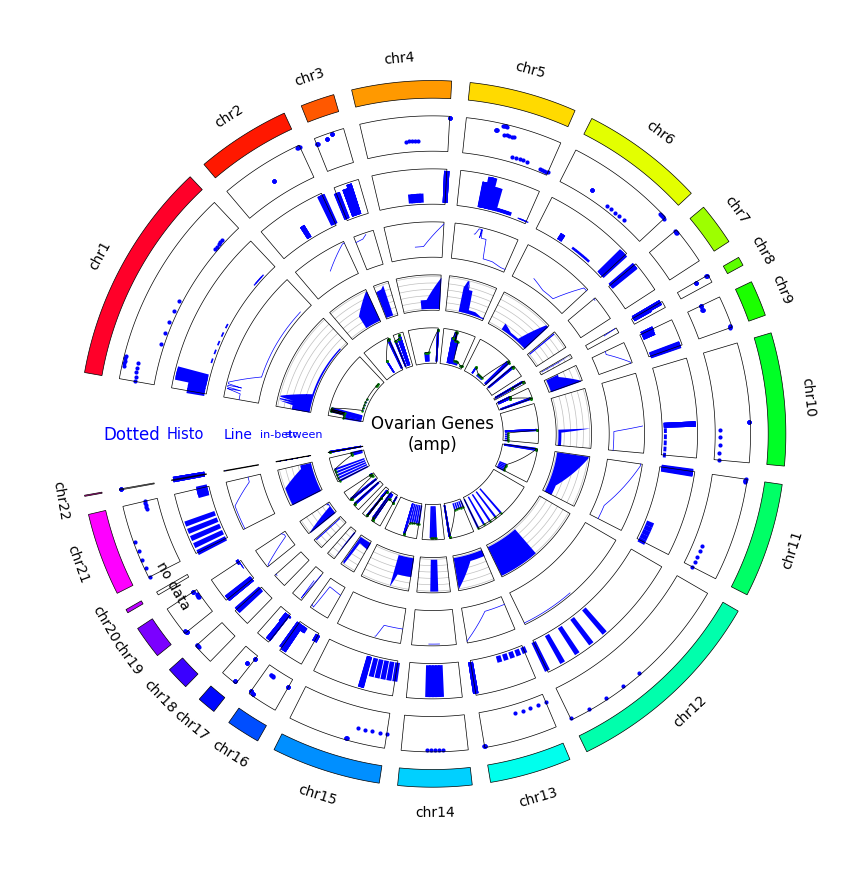

In [9]:
chr_bed_file = './output_data.bed'  
circos = Circos.initialize_from_bed(chr_bed_file, start=-80, end=260, space=3, endspace=False)
circos.text("Ovarian Genes\n(amp)", size=12)


ColorCycler.set_cmap("gist_rainbow")
chr_names = [s.name for s in circos.sectors]
colors = ColorCycler.get_color_list(len(chr_names))
chr_name2color = {name: color for name, color in zip(chr_names, colors)}


for sector in circos.sectors:
    sector.text(sector.name.replace("Chr", ""))
    color = chr_name2color[sector.name]
    outer_track = sector.add_track((95, 100))
    outer_track.axis(fc=color)
    
    step = 2000000
    
    cur_df = del_df[del_df["Chr"] == sector.name]
    
    # Check if cur_df is empty for amp genes
    if not cur_df.empty:
        tx = np.concatenate([np.linspace(row['n_start'], row['n_end'], 5) for index, row in cur_df.iterrows()])
        ty = np.concatenate([[row['negLogQ']] * 5 for index, row in cur_df.iterrows()])

        data = {
            'tx': tx,
            'ty': ty
        }
        df_tx_ty = pd.DataFrame(data)
        df_tx_ty_sorted = df_tx_ty.sort_values(by='tx').reset_index(drop=True)

        tx = df_tx_ty_sorted['tx'].values
        ty = df_tx_ty_sorted['ty'].values

        # print(df_tx_ty_sorted.head())
        
        track1 = sector.add_track((80, 90), r_pad_ratio=0.1)
        track1.axis()
        min_qval = cur_df['negLogQ'].min()  # Find the minimum qval in your data
        max_qval = cur_df['negLogQ'].max()  
        track1.scatter(tx, ty, vmax=max_qval, color="blue")
        
        track2 = sector.add_track((65, 75), r_pad_ratio=0.1)
        track2.axis()
        # add width = step
        track2.bar(tx, ty, width = step, color="blue")
        
        track3 = sector.add_track((50, 60), r_pad_ratio=0.1)
        track3.axis()
        track3.line(tx, ty, color="blue")
        
        track4 = sector.add_track((35, 45), r_pad_ratio=0.1)
        track4.axis()
        track4.grid()
        track4.fill_between(tx, ty, color="blue")
        
        line_bar_scatter_track = sector.add_track((20, 30), r_pad_ratio=0.1)
        line_bar_scatter_track.axis()
        line_bar_scatter_track.line(tx, ty, color="black")
        line_bar_scatter_track.bar(tx, ty, width=step, color="blue")
        line_bar_scatter_track.scatter(tx, ty, color="green", s=3)
        
        if sector.name == circos.sectors[0].name:
            circos.text("Dotted", r=track1.r_center, deg=-90, color="blue", size = 12)
            circos.text("Histo", r=track2.r_center, deg=-90, color="blue", size= 10.5)
            circos.text("Line", r=track3.r_center, deg=-90, color="blue", size=10)
            circos.text("in-between", r=track4.r_center, deg=-90, color="blue", size=8)
            circos.text("etc", r=track4.r_center, deg=-90, color="blue", size=6)
            
    else:
        track1 = sector.add_track((80, 90), r_pad_ratio=0.1)
        track1.axis()
        track1.text("no data")
        print(f"No AMP data for {sector.name}")
    

fig = circos.plotfig()